<a href="https://www.kaggle.com/code/kathanmehta/titanicccccc?scriptVersionId=130930449" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
train_data = pd.read_csv("/kaggle/input/titanic/train.csv")
train_data.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
test_data = pd.read_csv("/kaggle/input/titanic/test.csv")
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
# Counting the People who survived, died & number of people in the Training set
df_Survived = train_data[train_data['Survived']==1]
print("Total Survived People", df_Survived['Survived'].count())

df_Died = train_data[train_data['Survived']==0]
print("Total Dead People", df_Died['Survived'].count())

total_people = train_data['Survived'].count()
print("Total people",total_people )

Total Survived People 342
Total Dead People 549
Total people 891


In [5]:
# train_data.count()
test_data.count()

PassengerId    418
Pclass         418
Name           418
Sex            418
Age            332
SibSp          418
Parch          418
Ticket         418
Fare           417
Cabin           91
Embarked       418
dtype: int64

In [6]:
# Filter the data for first-class passengers
first_class = train_data[train_data['Pclass'] == 1]

# Filter the first-class passengers who survived
survived_first_class = first_class[first_class['Survived'] == 1]

# Print the count of people who survived with a first-class ticket
print("Number of people who survived with a first-class ticket:", survived_first_class.shape[0])


Number of people who survived with a first-class ticket: 136


In [7]:
# Filter the data for first-class passengers
second_class = train_data[train_data['Pclass'] == 2]

# Filter the first-class passengers who survived
survived_second_class = second_class[second_class['Survived'] == 1]

# Print the count of people who survived with a first-class ticket
print("Number of people who survived with a second-class ticket:", survived_second_class.shape[0])


Number of people who survived with a second-class ticket: 87


In [8]:
# Filter the data for first-class passengers
third_class = train_data[train_data['Pclass'] == 3]

# Filter the first-class passengers who survived
survived_third_class = third_class[third_class['Survived'] == 1]

# Print the count of people who survived with a first-class ticket
print("Number of people who survived with a third-class ticket:", survived_third_class.shape[0])




Number of people who survived with a third-class ticket: 119


In [9]:
# Filter the data for first-class passengers
first_class_dead = train_data[train_data['Pclass'] == 1]

# Filter the first-class passengers who survived
dead_first_class = first_class_dead[first_class_dead['Survived'] == 0]

# Print the count of people who survived with a first-class ticket
print("Number of people who died with a first-class ticket:", dead_first_class.shape[0])


Number of people who died with a first-class ticket: 80


In [10]:
# Filter the data for first-class passengers
second_class_dead = train_data[train_data['Pclass'] == 2]

# Filter the first-class passengers who survived
dead_second_class = second_class_dead[second_class_dead['Survived'] == 0]

# Print the count of people who survived with a first-class ticket
print("Number of people who died with a second-class ticket:", dead_second_class.shape[0])


Number of people who died with a second-class ticket: 97


In [11]:
# Filter the data for first-class passengers
third_class_dead = train_data[train_data['Pclass'] == 3]

# Filter the first-class passengers who survived
dead_third_class = third_class_dead[third_class_dead['Survived'] == 0]

# Print the count of people who survived with a first-class ticket
print("Number of people who died with a third-class ticket:", dead_third_class.shape[0])


Number of people who died with a third-class ticket: 372


In [12]:
print("Total Survival Count : ", 119+87+136)
print("Total Death Cont : ", 372+97+80)

Total Survival Count :  342
Total Death Cont :  549


Finding the Basic Pattern 

Pattern 1:- Here, we can see that majority of people are travelling through third class. We can also see that 3rd class has the highest deaths.  

In 3rd class from 491 people, 
**119** people survived 
**372** people died

While in First-class,
Number of people travelling with first class Ticket:  **216**
Number of people who survived with a first-class ticket: **136**

By comparing the data, we can observe something fishy. Despite the fact that there are fewer people in the first class, a higher proportion of them managed to survive.

This stark contrast suggests that there may have been certain discrepancies or factors favoring the survival of individuals in the first-class cabin. Further analysis and investigation are needed to understand the reasons behind this disparity.

In [13]:
print("Number of people travelling with first class Ticket: ",first_class['Pclass'].count() )
print("Number of people travelling with second class Ticket: ",second_class['Pclass'].count() )
print("Number of people travelling with third class Ticket: ",third_class['Pclass'].count() )
print("Verifying the Total : ", 216+184+491)

Number of people travelling with first class Ticket:  216
Number of people travelling with second class Ticket:  184
Number of people travelling with third class Ticket:  491
Verifying the Total :  891


In [14]:
total_third_class = third_class['Pclass'].count()
survived_third_class = 119
died_third_class = 372

average_survival_rate = survived_third_class / total_third_class
average_death_rate = died_third_class / total_third_class

print("Average survival rate in the third class:", average_survival_rate)
print("Average death rate in the third class:", average_death_rate)


Average survival rate in the third class: 0.24236252545824846
Average death rate in the third class: 0.7576374745417516


In [15]:
male_count = train_data[train_data['Sex']=="male"]
print("Total Male : ", male_count['Sex'].count())

female_count = train_data[train_data['Sex']=="female"]
print("Total Female: ", female_count['Sex'].count())

Total Male :  577
Total Female:  314


In [16]:
male_survived_count = train_data[(train_data['Sex'] == 'male') & (train_data['Survived'] == 1)]
print("Total Male Survived: ", male_survived_count['Survived'].count())

female_survived_count = train_data[(train_data['Sex'] == 'female') & (train_data['Survived'] == 1)]
print("Total Female Survived: ", female_survived_count['Survived'].count())


Total Male Survived:  109
Total Female Survived:  233


In [17]:
male_death_count = train_data[(train_data['Sex'] == 'male') & (train_data['Survived'] == 0)]
print("Total Male Died: ", male_death_count['Survived'].count())

female_death_count = train_data[(train_data['Sex'] == 'female') & (train_data['Survived'] == 0)]
print("Total Female Died: ", female_death_count['Survived'].count())


Total Male Died:  468
Total Female Died:  81


Pattern 2:- Here, We can see that there are more male than females on the titanic. The death ratio of male is high compared to females

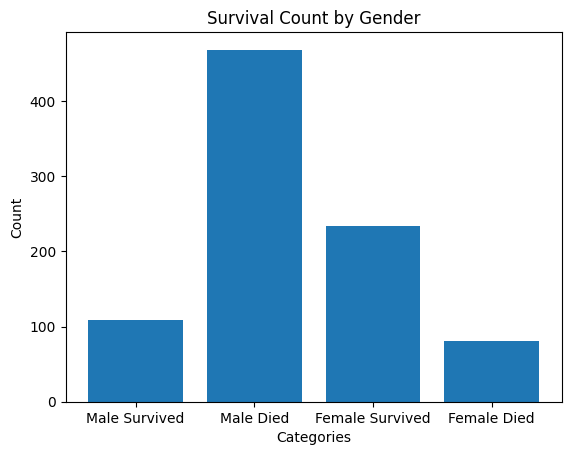

In [18]:
import matplotlib.pyplot as plt

# Data
categories = ['Male Survived', 'Male Died', 'Female Survived', 'Female Died']
counts = [male_survived_count['Survived'].count(), male_death_count['Survived'].count(), 
          female_survived_count['Survived'].count(), female_death_count['Survived'].count()]

# Bar chart
plt.bar(categories, counts)
plt.xlabel('Categories')
plt.ylabel('Count')
plt.title('Survival Count by Gender')
plt.show()


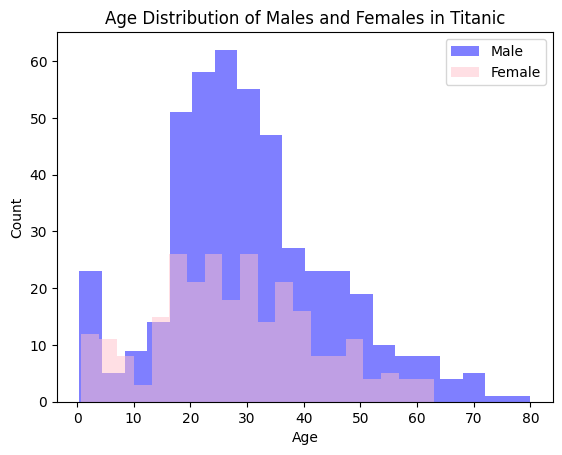

In [19]:
import matplotlib.pyplot as plt

# Filter data for male and female
male_data = train_data[train_data['Sex'] == 'male']
female_data = train_data[train_data['Sex'] == 'female']

# Plotting
plt.hist(male_data['Age'].dropna(), bins=20, color='blue', alpha=0.5, label='Male')
plt.hist(female_data['Age'].dropna(), bins=20, color='pink', alpha=0.5, label='Female')

# Labeling and formatting
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution of Males and Females in Titanic')
plt.legend()

# Display the plot
plt.show()


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


<AxesSubplot: xlabel='Pclass', ylabel='Age'>

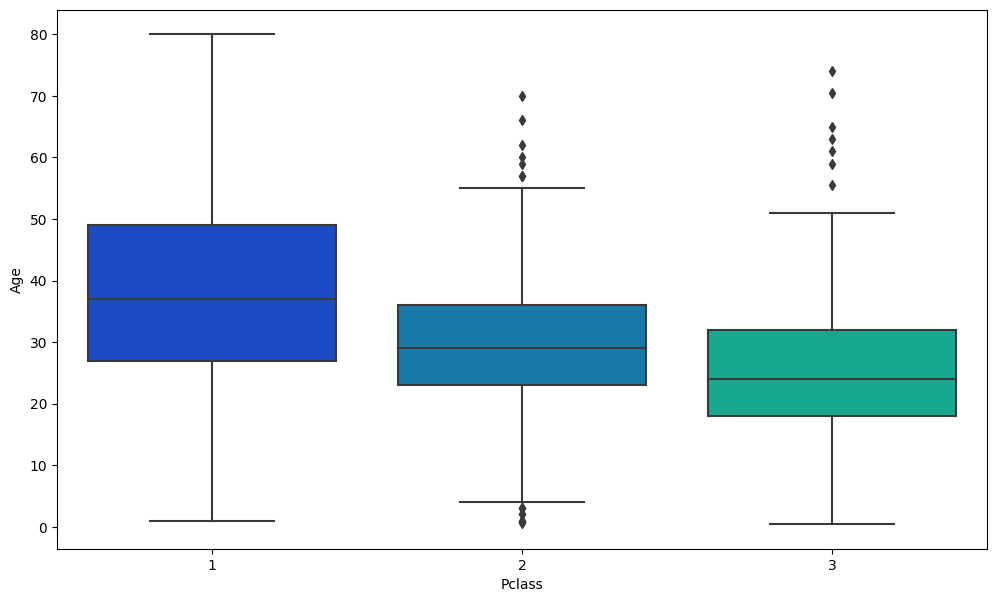

In [20]:
import seaborn as sns
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=train_data,palette='winter')

The average age for each of the classes are estimated to be as follows:

For Class 1 - The median age is 37
For Class 2 - The median age is 29
For Class 3 - The median age is 24

In [21]:
# train_data.shape
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        # Class-1
        if Pclass == 1:
            return 37
        # Class-2 
        elif Pclass == 2:
            return 29
        # Class-3
        else:
            return 24

    else:
        return Age

In [22]:
train_data['Age'] = train_data[['Age','Pclass']].apply(impute_age,axis=1)

In [23]:
# Training Data Preprocessing
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [24]:
train_data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [25]:
train_data.drop('Cabin', axis = 1,inplace=True)

In [26]:
train_data.shape

(891, 11)

In [27]:
train_data['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [28]:
train_data['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [29]:
sex = pd.get_dummies(train_data['Sex'],drop_first=True)
embark = pd.get_dummies(train_data['Embarked'],drop_first=True)
embark.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [30]:
train_data.fillna(train_data['Fare'].mean(),inplace=True)

In [31]:
sex.head()

,male
0,1
1,0
2,0
3,0
4,1


In [32]:
old_data = train_data.copy()
train_data.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)
train_data.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [33]:
train_data = pd.concat([train_data,sex,embark],axis=1)

In [34]:
train_data.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [35]:
#Building Model

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_data.drop('Survived',axis=1), 
                                                    train_data['Survived'], test_size=0.3, 
                                                    random_state=42)

In [36]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(623, 9)
(623,)
(268, 9)
(268,)


> **Logistic Regression**

In [37]:
from sklearn.linear_model import LogisticRegression

# Build the Model.
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [38]:
predict =  logmodel.predict(X_test)
predict[:5]

array([0, 0, 0, 1, 1])

In [39]:
y_test[:5]

709    1
439    0
840    0
720    1
39     1
Name: Survived, dtype: int64

In [40]:
from sklearn.metrics import confusion_matrix, classification_report,precision_score,recall_score,f1_score

In [41]:
print(confusion_matrix(y_test, predict))

[[134  23]
 [ 35  76]]


In [42]:
print(precision_score(y_test,predict))

0.7676767676767676


In [43]:
print(recall_score(y_test,predict))

0.6846846846846847


In [44]:
print(f1_score(y_test,predict))

0.7238095238095238


In [45]:
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       0.79      0.85      0.82       157
           1       0.77      0.68      0.72       111

    accuracy                           0.78       268
   macro avg       0.78      0.77      0.77       268
weighted avg       0.78      0.78      0.78       268



> **> ****preprocessing the test data****

In [46]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [47]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [48]:
sex = pd.get_dummies(test_data['Sex'], drop_first=True)
embark = pd.get_dummies(test_data['Embarked'], drop_first=True)

test_data.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

test_data = pd.concat([test_data,sex,embark],axis=1)

In [49]:
test_data.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Cabin,male,Q,S
0,892,3,34.5,0,0,7.8292,NaN,1,1,0
1,893,3,47.0,1,0,7.0000,NaN,0,0,1
2,894,2,62.0,0,0,9.6875,NaN,1,1,0
3,895,3,27.0,0,0,8.6625,NaN,1,0,1
4,896,3,22.0,1,1,12.2875,NaN,0,0,1


In [50]:
test_data.drop('Cabin', axis = 1, inplace= True)

In [51]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Age          332 non-null    float64
 3   SibSp        418 non-null    int64  
 4   Parch        418 non-null    int64  
 5   Fare         417 non-null    float64
 6   male         418 non-null    uint8  
 7   Q            418 non-null    uint8  
 8   S            418 non-null    uint8  
dtypes: float64(2), int64(4), uint8(3)
memory usage: 20.9 KB


In [52]:
test_data.fillna(test_data['Fare'].mean(),inplace=True)

In [53]:
p1=logmodel.predict(test_data)

In [54]:
p1

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [55]:
# Create submission file
submission_logistic = pd.DataFrame({
    "PassengerId": test_data['PassengerId'],
    "Survived": p1
})
submission_logistic.to_csv("submission_logistic.csv", index=False)

In [56]:
submission_logistic.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


> Decision Tree

In [57]:
from sklearn.tree import DecisionTreeClassifier

In [58]:
clf = DecisionTreeClassifier()

In [59]:
clf = DecisionTreeClassifier()

In [60]:
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)



In [61]:
accuracy = clf.score(X_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.7649253731343284


In [62]:
print(precision_score(y_test,predictions))

0.7222222222222222


> Model Conclusion :- We can say that Logistic Regression is the better model to use in this dataset as it has higher precision score which is **0.76** while Decision Tree has the precision score of **0.70**

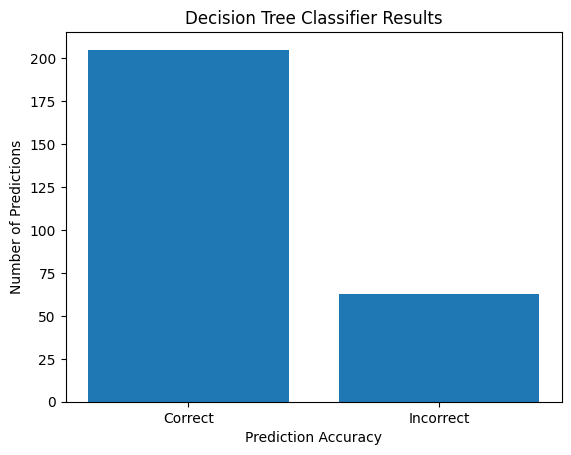

In [63]:
import matplotlib.pyplot as plt

# Calculate the number of correct predictions
correct_predictions = (predictions == y_test).sum()

# Calculate the number of incorrect predictions
incorrect_predictions = len(predictions) - correct_predictions

# Create a bar chart
plt.bar(['Correct', 'Incorrect'], [correct_predictions, incorrect_predictions])
plt.xlabel('Prediction Accuracy')
plt.ylabel('Number of Predictions')
plt.title('Decision Tree Classifier Results')

# Display the chart
plt.show()


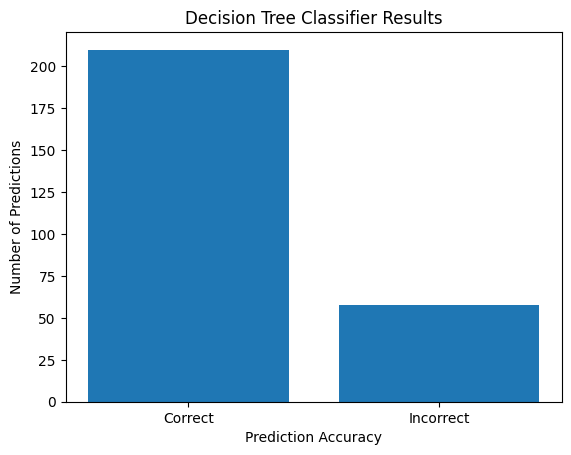

In [64]:
import matplotlib.pyplot as plt

# Calculate the number of correct predictions
correct_predictions = (predict == y_test).sum()

# Calculate the number of incorrect predictions
incorrect_predictions = len(predict) - correct_predictions

# Create a bar chart
plt.bar(['Correct', 'Incorrect'], [correct_predictions, incorrect_predictions])
plt.xlabel('Prediction Accuracy')
plt.ylabel('Number of Predictions')
plt.title('Decision Tree Classifier Results')

# Display the chart
plt.show()


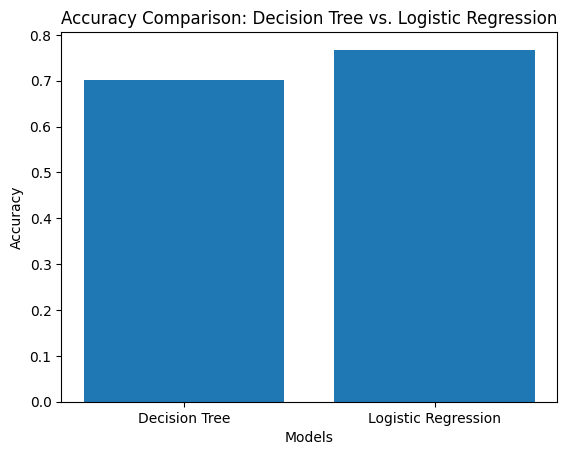

In [65]:
import matplotlib.pyplot as plt

decision_tree_accuracy = 0.7027027027027027 # accuracy of Decision Tree predictions
logistic_regression_accuracy = 0.7676767676767676 # accuracy of Logistic Regression predictions

# Creating the chart
models = ['Decision Tree', 'Logistic Regression']
accuracies = [decision_tree_accuracy, logistic_regression_accuracy]

plt.bar(models, accuracies)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison: Decision Tree vs. Logistic Regression')
plt.show()


> **Implementing the XGBoost**

XGBoost Accuracy :  0.8059701492537313


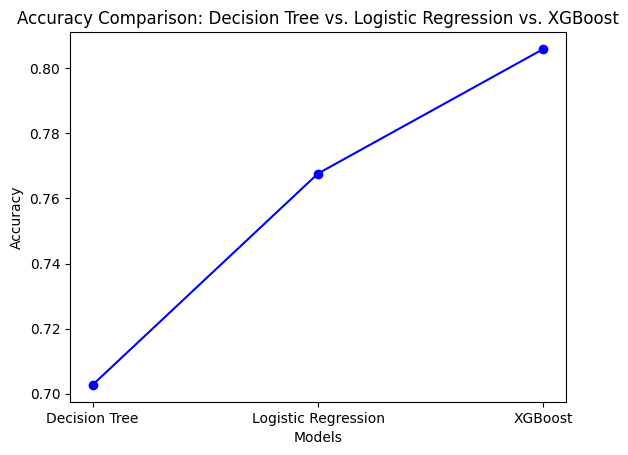

In [66]:
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

# Training the XGBoost model
xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train, y_train)

# Making predictions using XGBoost
xgb_predictions = xgb_model.predict(X_test)

# Calculating accuracy of XGBoost predictions
xgb_accuracy = accuracy_score(y_test, xgb_predictions)
print("XGBoost Accuracy : ", xgb_accuracy)

# Data for x-axis (model names)
models = ['Decision Tree', 'Logistic Regression', 'XGBoost']

# Data for y-axis (accuracy values)
accuracies = [decision_tree_accuracy, logistic_regression_accuracy, xgb_accuracy]

# Plotting the line chart
plt.plot(models, accuracies, marker='o', linestyle='-', color='blue')

# Adding labels and title to the chart
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison: Decision Tree vs. Logistic Regression vs. XGBoost')

# Displaying the chart
plt.show()


In [67]:
from sklearn.metrics import accuracy_score

# Logistic Regression Accuracy
logistic_accuracy = accuracy_score(y_test, predict)
print("Logistic Accuracy : ", logistic_accuracy)


# Decision Tree Accuracy
decision_accuracy = accuracy_score(y_test, predictions)
print("Decision Tree Accuracy : ", decision_accuracy)

# XGBoost Accuracy 
xgb_accuracy = accuracy_score(y_test, xgb_predictions)
print("XGBoost Accuracy : ", xgb_accuracy)

Logistic Accuracy :  0.7835820895522388
Decision Tree Accuracy :  0.7649253731343284
XGBoost Accuracy :  0.8059701492537313


> **Here, we can see that XGBoost is the highest accurate model with 0.80 accuracy while Decision tree has the lowest accuracy which is 0.76. Logistic resulted in accuracy which is 0.78**

In [68]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Age          418 non-null    float64
 3   SibSp        418 non-null    int64  
 4   Parch        418 non-null    int64  
 5   Fare         418 non-null    float64
 6   male         418 non-null    uint8  
 7   Q            418 non-null    uint8  
 8   S            418 non-null    uint8  
dtypes: float64(2), int64(4), uint8(3)
memory usage: 20.9 KB


In [69]:
xg = xgb_model.predict(test_data)

In [70]:
xg

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [71]:
# Create submission file
submission = pd.DataFrame({
    "PassengerId": test_data['PassengerId'],
    "Survived": xg
})
submission.to_csv("submission.csv", index=False)

In [72]:
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
